# Community Detection on Youtube and Twitch

In [2]:
import snap
import numpy as np 
from matplotlib import pyplot as plt
import networkx as nx
# !pip3 install python-louvain
import pandas as pd
import networkx as nx
import community
import matplotlib.colors as mcolors

In [12]:
# TODO : use networkx to read dataset normally like in the hw 
# instead of using pandas its running slow as ds is big

G = nx.read_edgelist("Dataset/youtube.txt", nodetype = int)
G.name = 'Youtube User-User Network'
print(nx.info(G))

Name: Youtube User-User Network
Type: Graph
Number of nodes: 1138499
Number of edges: 2990443
Average degree:   5.2533


Name: Youtube User-User Small Network
Type: Graph
Number of nodes: 637
Number of edges: 700
Average degree:   2.1978


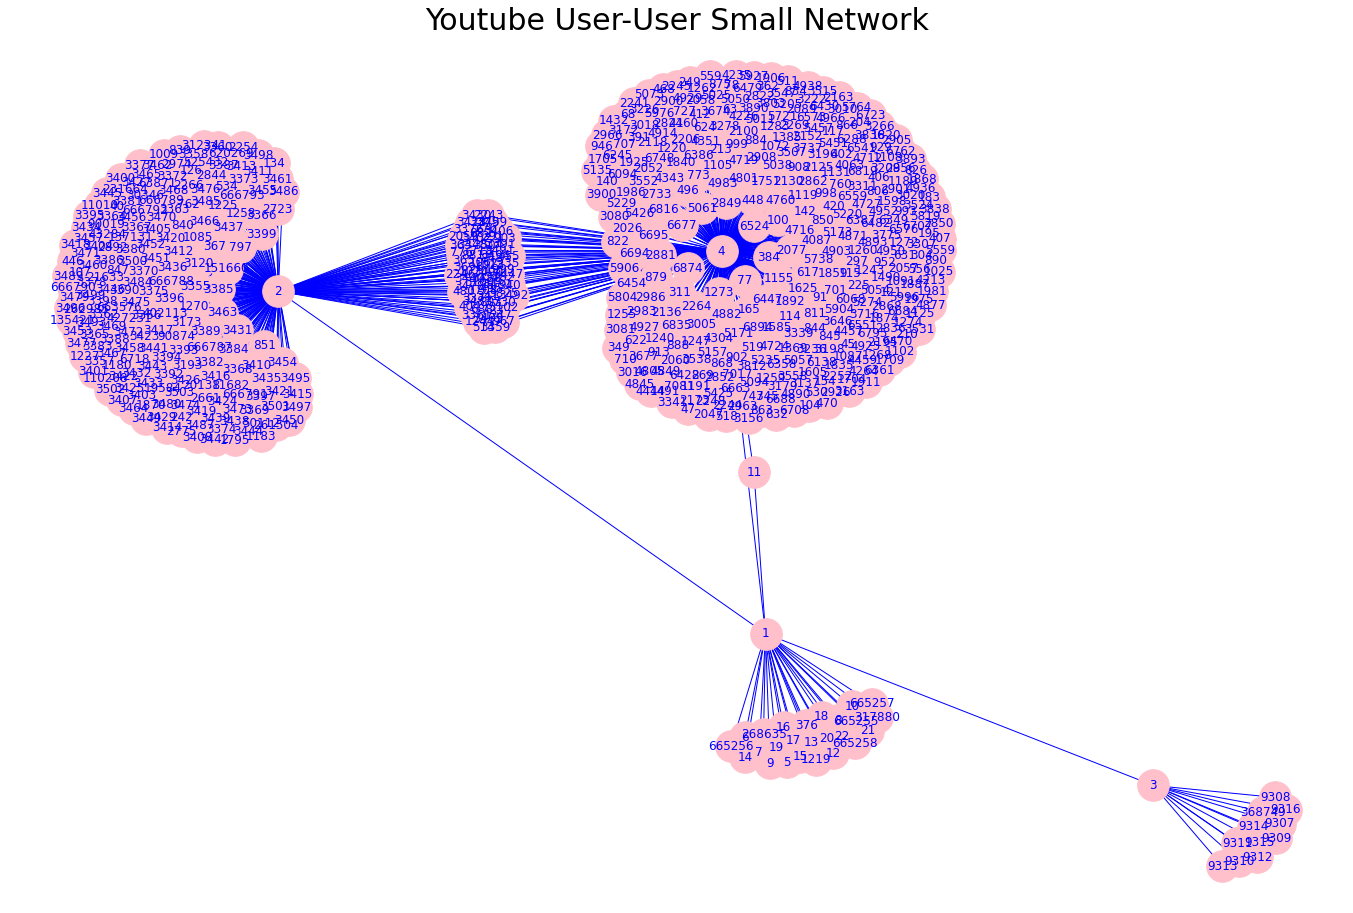

In [84]:
# getting only the first 500 nodes as it bigggg datasets
G_small= nx.Graph()
G_small.name= "Youtube User-User Small Network"
nodes = list(G.nodes)
edges = list(G.edges)
for i in range(500):
    G_small.add_node(nodes[i])
for i in range(700):
    G_small.add_edge(edges[i][0],edges[i][1])

print(nx.info(G_small))
position = nx.spring_layout(G_small)
plt.figure(figsize=(24,16))
nx.draw_networkx(G_small, 
                 position, 
                 with_labels=True, 
                 font_weight='normal', 
                 node_size=1000,
                 arrows=True,
                 node_color='pink',
                 font_color='blue',
                 edge_color='blue')
plt.title(G_small.name, size=30)
plt.axis('off')
plt.show()

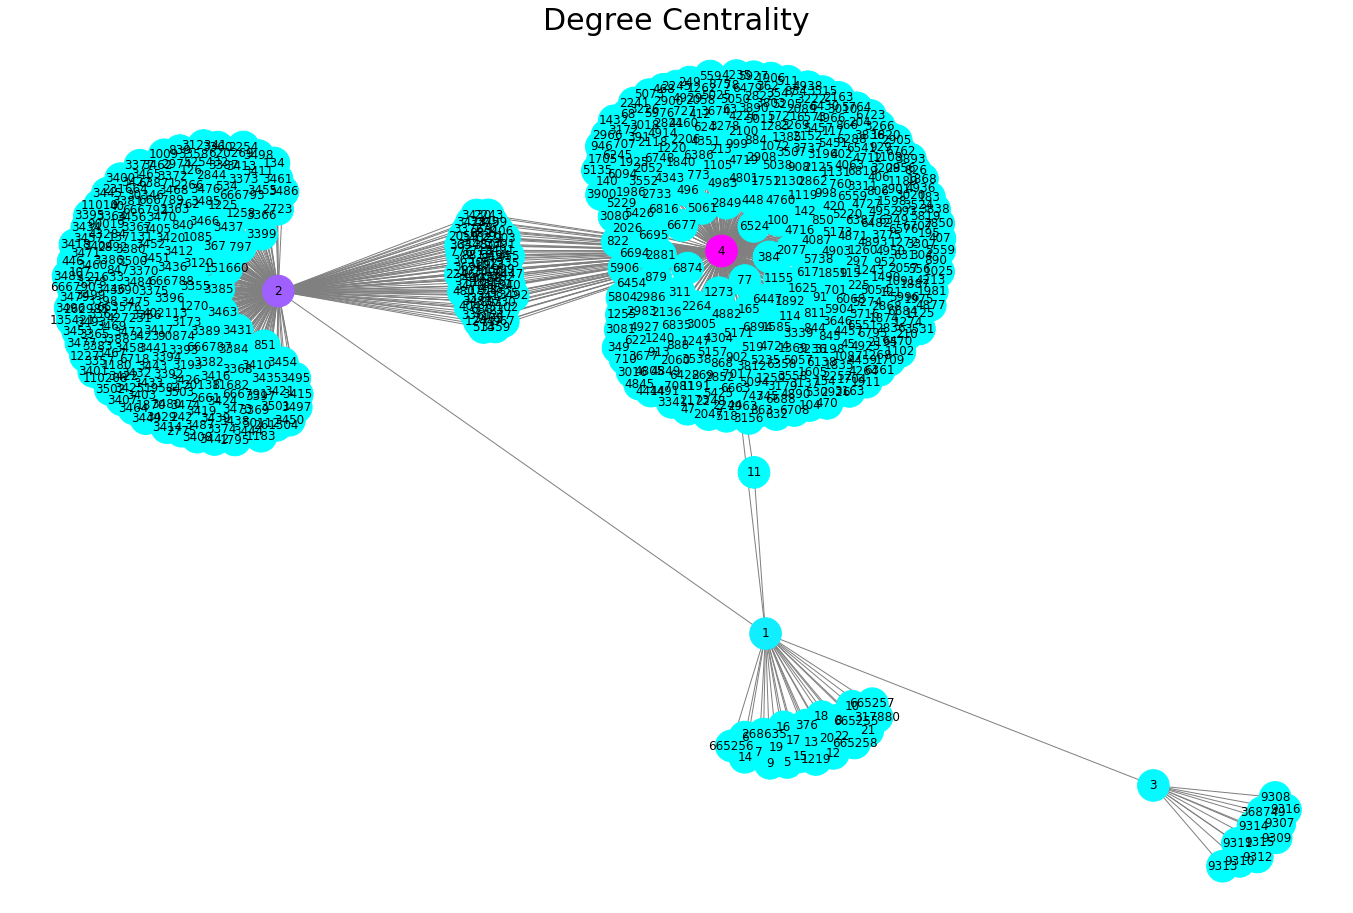

In [85]:
# 'Degree Centrality'
def graph_drawing(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=1000, 
                     with_labels=True,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()
    
graph_drawing(G_small, position, nx.degree_centrality(G_small), 'Degree Centrality')


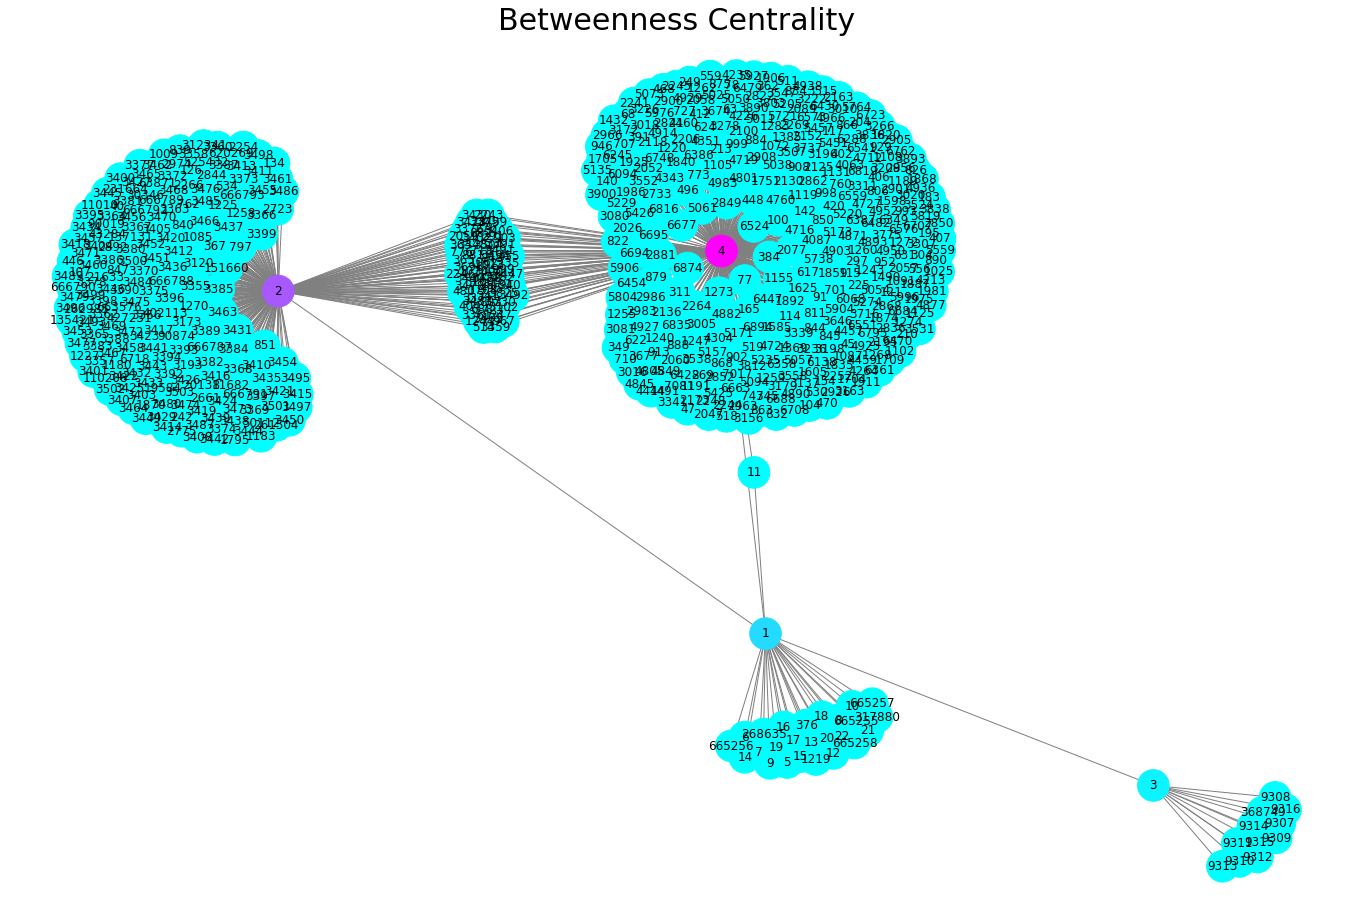

In [86]:
# 'Betweenness Centrality'
graph_drawing(G_small, position, nx.betweenness_centrality(G_small), 'Betweenness Centrality')

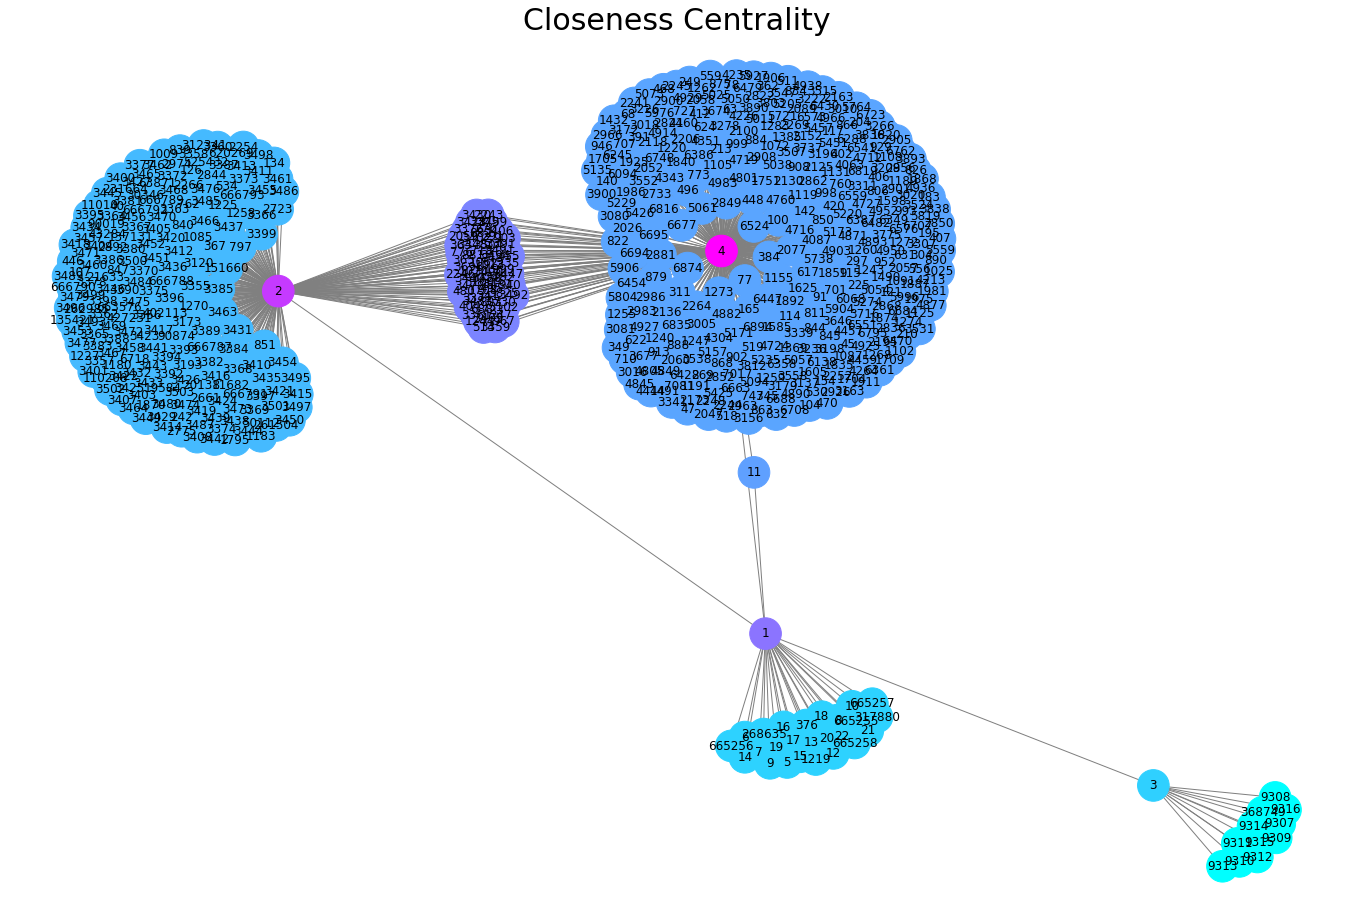

In [87]:
graph_drawing(G_small, position, nx.closeness_centrality(G_small), 'Closeness Centrality')

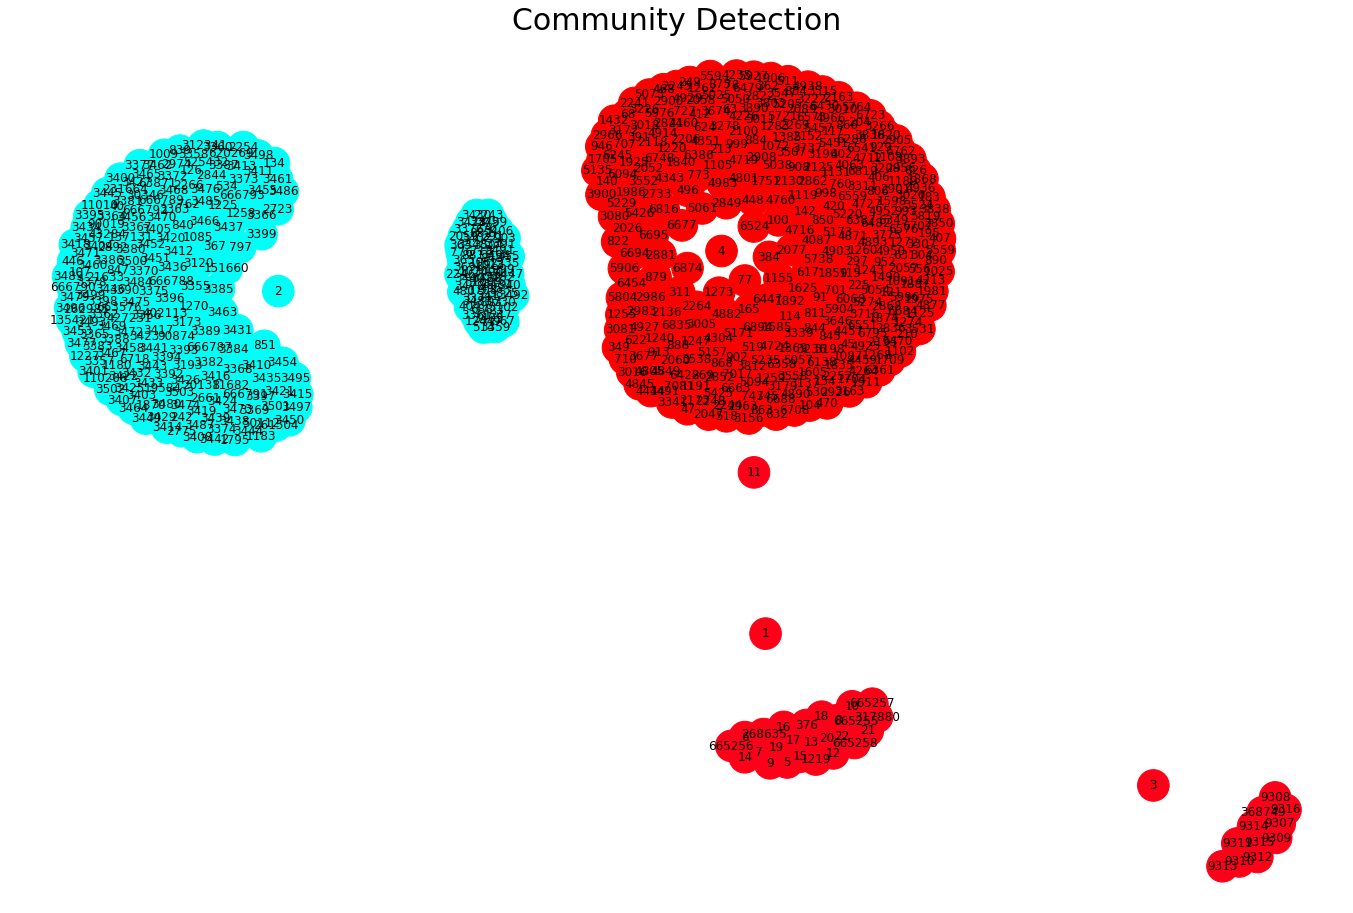

In [88]:
partition = community.best_partition(G_small, random_state=1992)
values = [partition.get(node) for node in G_small.nodes()]
plt.figure(figsize=(24,16))
nx.draw_networkx(G_small,
                 position,
                 cmap=plt.get_cmap('hsv'),
                 arrows=True,
                 node_color=values, 
                 edge_color='white',
                 node_size=1000, 
                 with_labels=True, 
                 font_weight='normal')
plt.title('Community Detection', size=30)
plt.axis('off')
plt.show()